In [73]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib as mpl
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as plt

import numpy as np
from scipy import stats
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn import preprocessing

%matplotlib inline

import scipy.stats as stats

import sklearn
import statsmodels.api as sm

from scipy.stats import mode

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [74]:
#importing original dataset
base_raw_data=pd.read_csv(r'C:/Users/Supreetha/Downloads/autos.csv',encoding = "ISO-8859-1")
print(base_raw_data.shape)
print(list(base_raw_data.columns))

(371528, 20)
['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen']


In [75]:
base_raw_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [97]:
data1_subset=base_raw_data[['price', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage', 'postalCode']]
data1_subset.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
0,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,70435
1,18300,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja,66954
2,9800,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN,90480
3,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,91074
4,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,60437


In [98]:
data1_subset['gearbox']=np.where(data1_subset['gearbox']=='manuell','manual',data1_subset['gearbox'])
data1_subset['gearbox']=np.where(data1_subset['gearbox']=='automatik','automatic',data1_subset['gearbox'])
data1_subset.head()

C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
0,480,NaN,1993,manual,0,golf,150000,benzin,volkswagen,NaN,70435
1,18300,coupe,2011,manual,190,NaN,125000,diesel,audi,ja,66954
2,9800,suv,2004,automatic,163,grand,125000,diesel,jeep,NaN,90480
3,1500,kleinwagen,2001,manual,75,golf,150000,benzin,volkswagen,nein,91074
4,3600,kleinwagen,2008,manual,69,fabia,90000,diesel,skoda,nein,60437


In [99]:
print(data1_subset['gearbox'].unique())

['manual' 'automatic' nan]


In [100]:
print(data1_subset['fuelType'].unique())

['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']


In [101]:
data1_subset['fuelType']=np.where(data1_subset['fuelType']=='benzin','petrol',data1_subset['fuelType'])
data1_subset['fuelType']=np.where(data1_subset['fuelType']=='cng','gas',data1_subset['fuelType'])
data1_subset['fuelType']=np.where(data1_subset['fuelType']=='lpg','gas',data1_subset['fuelType'])
data1_subset['fuelType']=np.where(data1_subset['fuelType']=='elektro','electric',data1_subset['fuelType'])
data1_subset['fuelType']=np.where(data1_subset['fuelType']=='andere','other',data1_subset['fuelType'])
data1_subset.head()

C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,70435
1,18300,coupe,2011,manual,190,NaN,125000,diesel,audi,ja,66954
2,9800,suv,2004,automatic,163,grand,125000,diesel,jeep,NaN,90480
3,1500,kleinwagen,2001,manual,75,golf,150000,petrol,volkswagen,nein,91074
4,3600,kleinwagen,2008,manual,69,fabia,90000,diesel,skoda,nein,60437


In [102]:
data1_subset['brand'].dropna(inplace=True)

C:\Users\Supreetha\Anaconda3\lib\site-packages\pandas\core\series.py:3893: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [103]:
print(data1_subset['vehicleType'].unique())

[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']


In [104]:
data1_subset['vehicleType']=np.where(data1_subset['vehicleType']=='kleinwagen','smallcar',data1_subset['vehicleType'])
data1_subset['vehicleType']=np.where(data1_subset['vehicleType']=='kombi','Combi',data1_subset['vehicleType'])
data1_subset['vehicleType']=np.where(data1_subset['vehicleType']=='andere','other',data1_subset['vehicleType'])
data1_subset.head()

C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,70435
1,18300,coupe,2011,manual,190,NaN,125000,diesel,audi,ja,66954
2,9800,suv,2004,automatic,163,grand,125000,diesel,jeep,NaN,90480
3,1500,smallcar,2001,manual,75,golf,150000,petrol,volkswagen,nein,91074
4,3600,smallcar,2008,manual,69,fabia,90000,diesel,skoda,nein,60437


In [105]:
print(data1_subset['notRepairedDamage'].unique())

[nan 'ja' 'nein']


In [106]:
data1_subset['notRepairedDamage']=np.where(data1_subset['notRepairedDamage']=='ja','yes',data1_subset['notRepairedDamage'])
data1_subset['notRepairedDamage']=np.where(data1_subset['notRepairedDamage']=='nein','no',data1_subset['notRepairedDamage'])
data1_subset.head()

C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Supreetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,70435
1,18300,coupe,2011,manual,190,NaN,125000,diesel,audi,yes,66954
2,9800,suv,2004,automatic,163,grand,125000,diesel,jeep,NaN,90480
3,1500,smallcar,2001,manual,75,golf,150000,petrol,volkswagen,no,91074
4,3600,smallcar,2008,manual,69,fabia,90000,diesel,skoda,no,60437


In [107]:
data1_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 11 columns):
price                 371528 non-null int64
vehicleType           333659 non-null object
yearOfRegistration    371528 non-null int64
gearbox               351319 non-null object
powerPS               371528 non-null int64
model                 351044 non-null object
kilometer             371528 non-null int64
fuelType              338142 non-null object
brand                 371528 non-null object
notRepairedDamage     299468 non-null object
postalCode            371528 non-null int64
dtypes: int64(5), object(6)
memory usage: 31.2+ MB


In [108]:
print(data1_subset['yearOfRegistration'].unique())

[1993 2011 2004 2001 2008 1995 1980 2014 1998 2005 1910 2016 2007 2009
 2002 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010
 2000 1992 2013 1996 1985 1989 2015 1968 1982 1976 1983 1959 1973 1111
 1969 1971 1987 1986 1988 1967 1970 1965 1945 1925 1974 1979 1955 1978
 1972 1977 1961 1963 1964 1960 1966 1975 1937 1936 5000 1954 1958 9999
 1956 3200 1000 1933 1941 1962 8888 1500 2200 4100 1929 1951 1957 1940
 3000 2066 1949 2019 1800 1953 1935 1234 8000 5300 9000 2900 6000 5900
 5911 1400 1950 4000 1948 1952 1200 8500 1932 1255 1927 1923 1931 3700
 3800 4800 1942 7000 1911 6500 2290 2500 1930 1001 6200 9450 1944 1943
 1947 1934 1938 1688 2800 1253 1928 7500 1919 5555 7777 5600 1600 1939
 2222 1039 9996 1300 8455 1915 4500 1920 1602 7800 9229 1946 7100 8200
 3500]


8455        1
3700        1
2290        1
8200        1
8500        1
9229        1
6500        1
2066        1
5900        1
1039        1
6200        1
9996        1
7777        1
2900        1
4100        1
1602        1
1200        1
9450        1
1400        1
1255        1
1001        1
7800        1
1915        1
1919        1
1920        1
3200        1
1688        1
2200        1
1925        1
3500        1
        ...  
1989     1342
1991     2810
1990     2852
2015     2982
1992     3048
1993     3469
2018     3993
2014     4802
1994     4872
2013     6157
2012     9418
1995     9658
2016     9859
2017    10546
1996    10886
2011    12068
2010    12354
1997    14706
2009    15607
2008    16175
2007    17673
1998    17951
2002    19189
2004    19746
2003    19873
2001    20218
2006    20230
2005    22316
1999    22767
2000    24551
Name: yearOfRegistration, Length: 155, dtype: int64


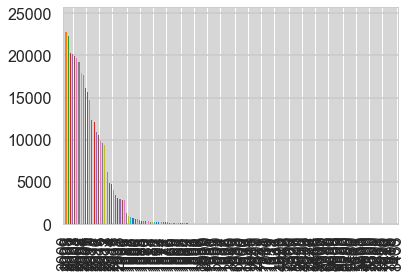

In [109]:
#count of cars by year
# we can see that year column has lot of wrong values, which we will clean in the next step
count_of_car_by_year=data1_subset[['yearOfRegistration','brand']]
count_of_car_by_year['yearOfRegistration'].value_counts().plot(kind='bar')
print(count_of_car_by_year['yearOfRegistration'].value_counts().sort_values())

In [112]:


data1_subset=data1_subset.drop(data1_subset[data1_subset.yearOfRegistration<1999].index)
data1_subset=data1_subset.drop(data1_subset[data1_subset.yearOfRegistration>2019].index)
print(data1_subset['yearOfRegistration'].unique())

[2011 2004 2001 2008 2014 2005 2016 2007 2009 2002 2018 2017 2003 2006
 1999 2012 2010 2000 2013 2015 2019]


2019       27
2015     2982
2018     3993
2014     4802
2013     6157
2012     9418
2016     9859
2017    10546
2011    12068
2010    12354
2009    15607
2008    16175
2007    17673
2002    19189
2004    19746
2003    19873
2001    20218
2006    20230
2005    22316
1999    22767
2000    24551
Name: yearOfRegistration, dtype: int64


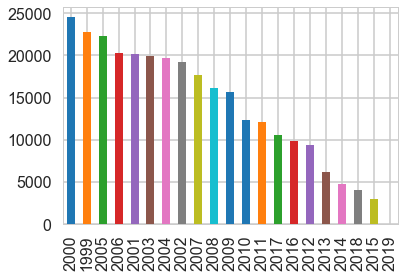

In [113]:
count_of_car_by_year=data1_subset[['yearOfRegistration','brand']]
count_of_car_by_year['yearOfRegistration'].value_counts().plot(kind='bar')
print(count_of_car_by_year['yearOfRegistration'].value_counts().sort_values())

In [114]:
count_of_car_by_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290551 entries, 1 to 371527
Data columns (total 2 columns):
yearOfRegistration    290551 non-null int64
brand                 290551 non-null object
dtypes: int64(1), object(1)
memory usage: 6.7+ MB


In [115]:
data1_subset.head()


,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
1,18300,coupe,2011,manual,190,NaN,125000,diesel,audi,yes,66954
2,9800,suv,2004,automatic,163,grand,125000,diesel,jeep,NaN,90480
3,1500,smallcar,2001,manual,75,golf,150000,petrol,volkswagen,no,91074
4,3600,smallcar,2008,manual,69,fabia,90000,diesel,skoda,no,60437
6,2200,cabrio,2004,manual,109,2_reihe,150000,petrol,peugeot,no,67112


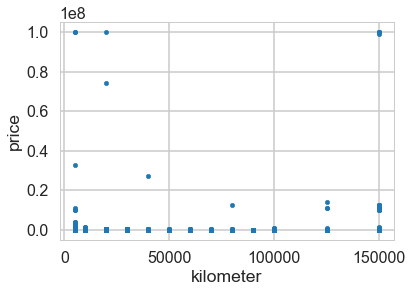

In [116]:
ax = data1_subset.plot.scatter(x="kilometer", y="price")

In [117]:
data1_subset=data1_subset.drop(data1_subset[data1_subset.price<3000].index)

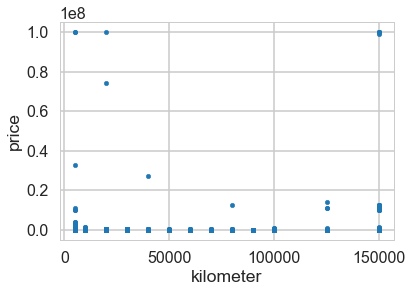

In [118]:
ax = data1_subset.plot.scatter(x="kilometer", y="price")

In [119]:
print(data1_subset['price'].unique())

[18300  9800  3600 ... 18429 24895 10985]


In [120]:
data1_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168799 entries, 1 to 371527
Data columns (total 11 columns):
price                 168799 non-null int64
vehicleType           159753 non-null object
yearOfRegistration    168799 non-null int64
gearbox               164536 non-null object
powerPS               168799 non-null int64
model                 163798 non-null object
kilometer             168799 non-null int64
fuelType              161752 non-null object
brand                 168799 non-null object
notRepairedDamage     150809 non-null object
postalCode            168799 non-null int64
dtypes: int64(5), object(6)
memory usage: 15.5+ MB


In [121]:
data1_subset.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
1,18300,coupe,2011,manual,190,NaN,125000,diesel,audi,yes,66954
2,9800,suv,2004,automatic,163,grand,125000,diesel,jeep,NaN,90480
4,3600,smallcar,2008,manual,69,fabia,90000,diesel,skoda,no,60437
8,14500,bus,2014,manual,125,c_max,30000,petrol,ford,NaN,94505
14,17999,suv,2011,manual,190,navara,70000,diesel,nissan,no,4177
